# Clustering - K-Means - HW10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Wine.csv Dataset 

In [6]:
wine_data = pd.read_csv("Wine.csv", na_values='?').dropna()
wine_data.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [7]:
wine_data['Type'] = wine_data['Type'] - 1
number_of_unique_classes = np.unique(np.array(wine_data.Type))
print("Unique classes in response: %s" % number_of_unique_classes)

Unique classes in response: [0 1 2]


`Alcohol` vs. `Malic`

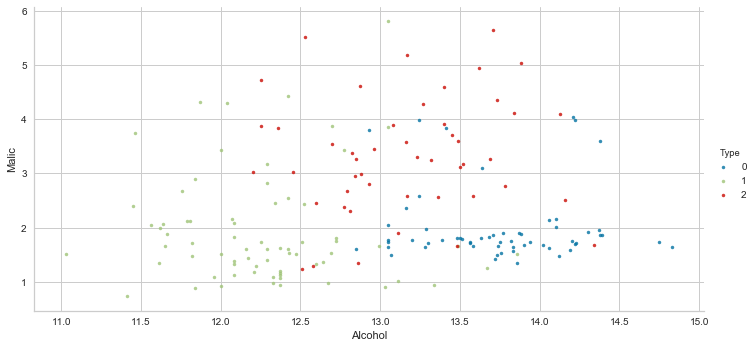

In [6]:
sns.lmplot(x = "Alcohol", y = "Malic", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

`Alcalinity` vs. `Magnesium`

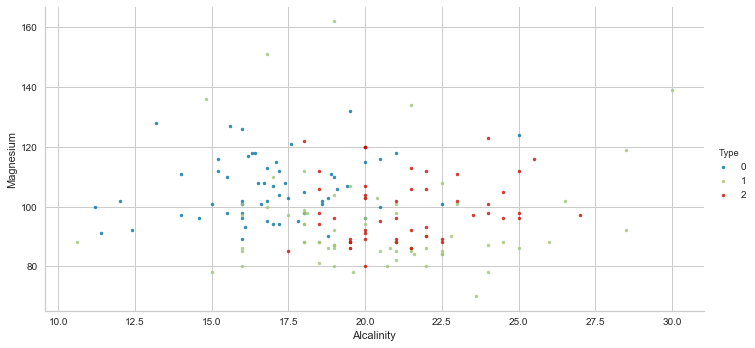

In [7]:
sns.lmplot(x = "Alcalinity", y = "Magnesium", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

`Flavanoids` vs. `Color`

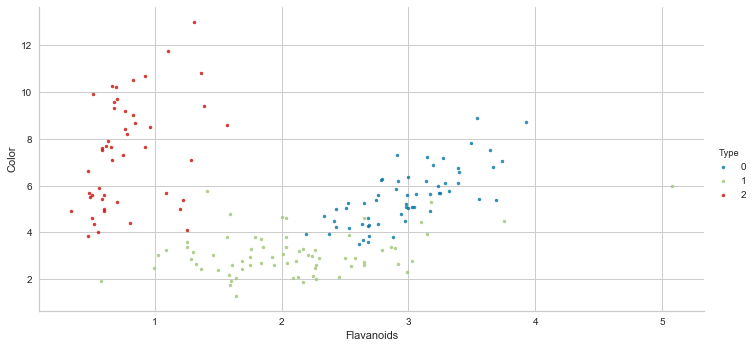

In [8]:
sns.lmplot(x = "Flavanoids", y = "Color", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

`Alcalinity` vs. `Color`

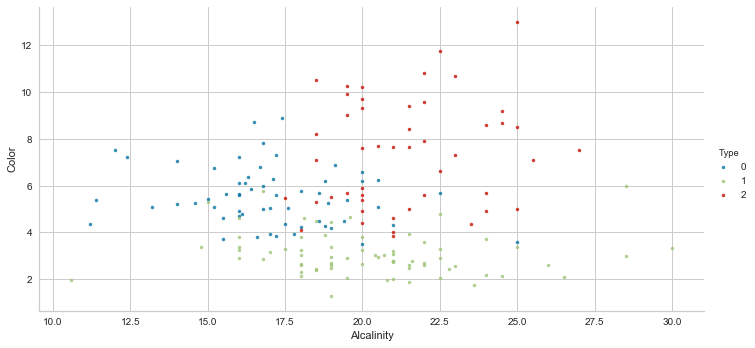

In [9]:
sns.lmplot(x = "Alcalinity", y = "Color", data = wine_data, 
           hue = "Type", fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [10]:
X = wine_data.drop(['Type'], axis = 1)
y = wine_data['Type'].values

In [11]:
print("X has shapes: %s" % str((X.shape)))

X has shapes: (178, 13)


## K-Means Clustering, K=2

In [12]:
model_kmeans = KMeans(n_clusters = 3)
print(model_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [13]:
model_groups = model_kmeans.fit(X)
model_groups.cluster_centers_

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [14]:
print("Shapes of model group clustes: %s" % str(model_groups.cluster_centers_.shape))

Shapes of model group clustes: (3, 13)


In [15]:
model_groups_cluster_centers = model_groups.cluster_centers_.transpose()
print("Shapes of model group clustes: %s" % str(model_groups_cluster_centers.shape))

Shapes of model group clustes: (13, 3)


In [16]:
clusters = model_groups.fit_predict(X)
print("Number of unique clusters: %s" % np.unique(clusters))

Number of unique clusters: [0 1 2]


In [17]:
X['clusters'] = clusters
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [18]:
np.unique(list(X.clusters))

array([0, 1, 2])

`Alcohol` vs. `Malic`

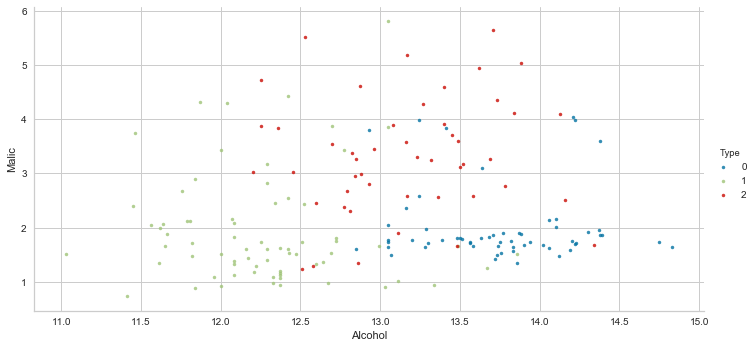

In [19]:
sns.lmplot(x = "Alcohol", y = "Malic", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

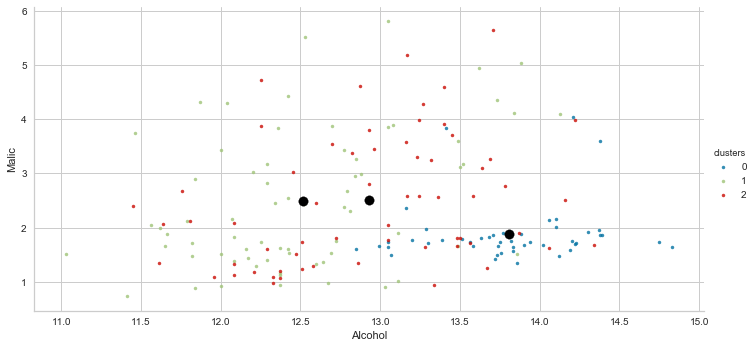

In [20]:
sns.lmplot(x = "Alcohol", y = "Malic", data = X, 
           hue = 'clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)

plt.scatter(model_groups_cluster_centers[0], 
            model_groups_cluster_centers[1], s = 90, color = 'black')
plt.show()

`Alcalinity` vs. `Magnesium`

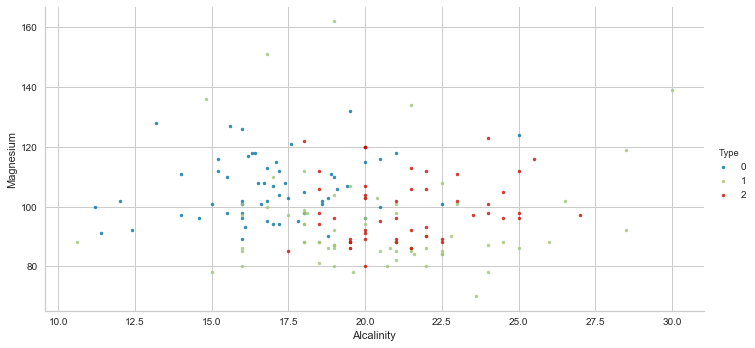

In [21]:
sns.lmplot(x = "Alcalinity", y = "Magnesium", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

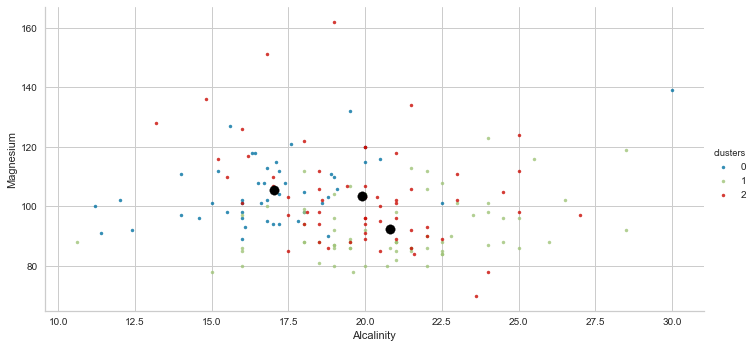

In [22]:
sns.lmplot(x = "Alcalinity", y = "Magnesium", data = X, 
           hue = 'clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)

plt.scatter(model_groups_cluster_centers[3], 
            model_groups_cluster_centers[4], s = 90, color = 'black')
plt.show()

`Flavanoids` vs. `Color`

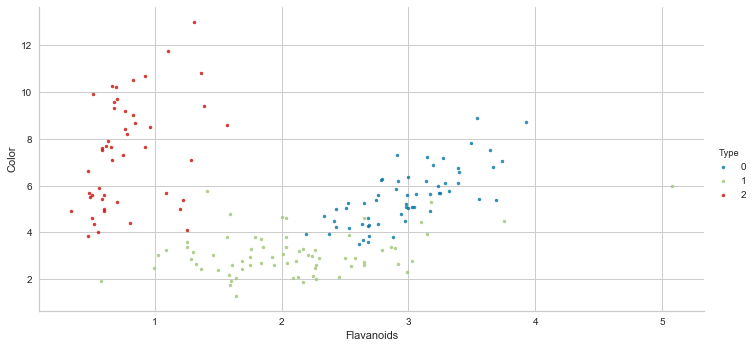

In [23]:
sns.lmplot(x = "Flavanoids", y = "Color", data = wine_data, 
           hue = 'Type', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

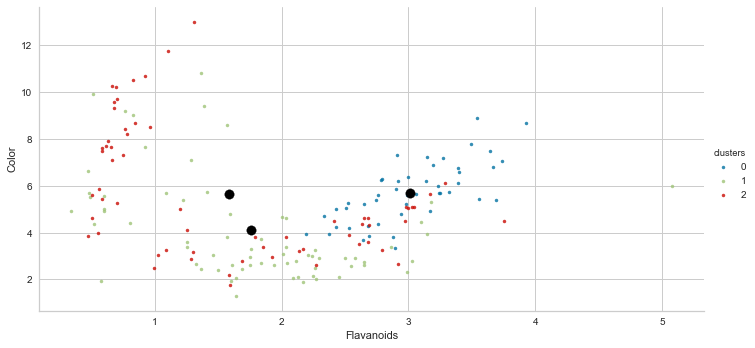

In [24]:
sns.lmplot(x = "Flavanoids", y = "Color", data = X, 
           hue = 'clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.scatter(model_groups_cluster_centers[6], 
            model_groups_cluster_centers[9], s = 90, color = 'black')
plt.show()

`Alcalinity` vs. `Color`

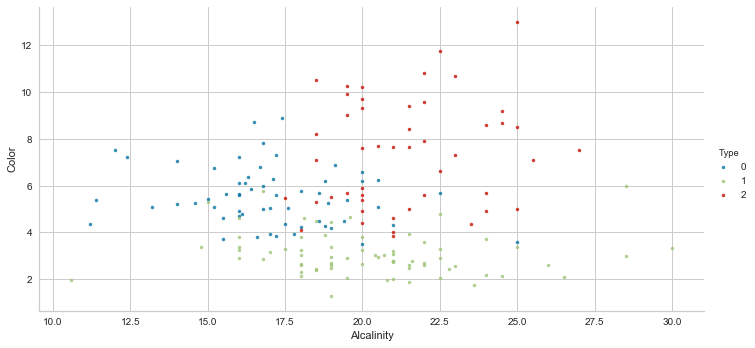

In [25]:
sns.lmplot(x = "Alcalinity", y = "Color", data = wine_data, 
           hue = 'Type',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

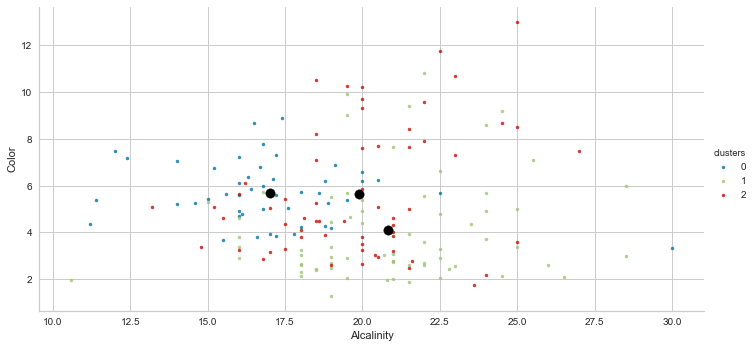

In [26]:
sns.lmplot(x = "Alcalinity", y = "Color", data = X, 
           hue = 'clusters',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.scatter(model_groups_cluster_centers[3], 
            model_groups_cluster_centers[9], s = 90, color = 'black')
plt.show()

In [27]:
print(confusion_matrix(y, model_kmeans.labels_))

[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]


In [28]:
print(classification_report(y, model_kmeans.labels_))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87        59
           1       0.72      0.70      0.71        71
           2       0.47      0.60      0.53        48

    accuracy                           0.70       178
   macro avg       0.72      0.70      0.70       178
weighted avg       0.74      0.70      0.71       178



In [29]:
print("Measure inertia %s" % model_kmeans.inertia_)

Measure inertia 2370689.686782968


In [30]:
print("Model score %s" % model_kmeans.score(X.drop(['clusters'], axis=1)))

Model score -2370689.6867829673


## Mini Batch K-Means

In [31]:
X = X.drop(['clusters'], axis=1)

In [32]:
model_kmeans_mini_batch = MiniBatchKMeans(n_clusters = 3, batch_size = 50,  max_iter = 200)
print(model_kmeans_mini_batch)

MiniBatchKMeans(batch_size=50, compute_labels=True, init='k-means++',
                init_size=None, max_iter=200, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)


In [33]:
model_mini_groups = model_kmeans_mini_batch.fit(X)
model_mini_groups.cluster_centers_

array([[1.38081322e+01, 1.88925287e+00, 2.44071839e+00, 1.70827586e+01,
        1.06410920e+02, 2.88275862e+00, 3.02083333e+00, 2.90201149e-01,
        1.89962644e+00, 5.71594828e+00, 1.07232759e+00, 3.11491379e+00,
        1.20225000e+03],
       [1.24564334e+01, 2.44568849e+00, 2.27934537e+00, 2.07853273e+01,
        9.25372460e+01, 2.03200903e+00, 1.76079007e+00, 3.94695260e-01,
        1.42688488e+00, 3.96329570e+00, 9.63160271e-01, 2.47395034e+00,
        4.52695260e+02],
       [1.29179371e+01, 2.54055010e+00, 2.41829077e+00, 2.00893910e+01,
        1.02165029e+02, 2.09819253e+00, 1.55819253e+00, 4.01866405e-01,
        1.49404715e+00, 5.60768173e+00, 8.81025540e-01, 2.36198428e+00,
        7.16013752e+02]])

In [34]:
print("Shapes of model group clustes: %s" % str(model_mini_groups.cluster_centers_.shape))

Shapes of model group clustes: (3, 13)


In [35]:
model_mini_groups_cluster_centers = model_mini_groups.cluster_centers_.transpose()
print("Shapes of model group clustes: %s" % str(model_mini_groups_cluster_centers.shape))

Shapes of model group clustes: (13, 3)


In [36]:
clusters = model_groups.fit_predict(X)
print("Number of unique clusters: %s" % np.unique(clusters))

Number of unique clusters: [0 1 2]


In [37]:
X['clusters'] = clusters
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [38]:
print(confusion_matrix(y, model_kmeans_mini_batch.labels_))

[[46  0 13]
 [ 1 50 20]
 [ 0 18 30]]


In [39]:
np.unique(model_kmeans_mini_batch.labels_)

array([0, 1, 2], dtype=int32)

In [40]:
print(classification_report(y, model_kmeans_mini_batch.labels_))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87        59
           1       0.74      0.70      0.72        71
           2       0.48      0.62      0.54        48

    accuracy                           0.71       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.75      0.71      0.72       178



In [41]:
print("Measure inertia %s" % model_kmeans.inertia_)

Measure inertia 2370689.686782968


In [42]:
print("Model score %s" % model_kmeans.score(X.drop(['clusters'], axis=1)))

Model score -2370689.6867829673


## Elbow Method to determine K

In [43]:
from yellowbrick.cluster import KElbowVisualizer

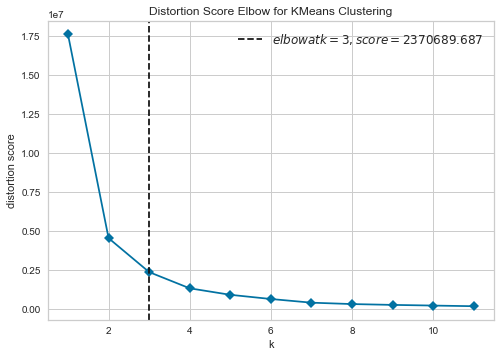

In [46]:
model = KMeans()

visualizer = KElbowVisualizer(
    model, k=(1,12), metric='distortion', timings=False
)

visualizer.fit(X.drop(['clusters'], axis = 1))    
visualizer.poof()   
plt.show()

***